In [2]:
import sys
sys.path.insert(0,"/share/home/ychi/dev/hic_basic")
sys.path.insert(0,"/share/home/ychi/dev/hires_utils")
sys.path.insert(0,"/share/home/ychi/dev/sperm_struct")
from pathlib import Path

import pandas as pd
from lib.plot import plot_figure

In [4]:
ddir = Path("/shareb/ychi/repo/sperm_struct/notebooks/data/")
sdir = Path("/share/home/ychi/dev/sperm_struct")
#lr_contour = pd.read_pickle(ddir / "tillsperm25.lr_contour.pkl")
#dv_contour = pd.read_pickle(ddir / "tillsperm25.dv_contour.pkl")
lr_contour = pd.read_pickle(
    sdir / "notebooks" / "Fig1_contour" / "mESC.lr_contour.pkl")
#dv_contour = pd.read_pickle(ddir / "mESC.dv_contour.pkl")

In [5]:
batches = [
    "mESC"
]

arg_bfs_lr_ss_files = { # single slice
    batch : (ddir / batch).with_suffix(".lr_ss.bfs.pkl")
    for batch in batches
}

arg_bfs_dv_ss_files = {
    batch : (ddir / batch).with_suffix(".dv_ss.bfs.pkl")
    for batch in batches
}

arg_bfs_lr_ft_files = { # full thickness
    batch : (ddir / batch).with_suffix(".lr_ft.bfs.pkl")
    for batch in batches
}

arg_bfs_voxel_files = {
    batch : (ddir / batch).with_suffix(".voxel.bfs.pkl")
    for batch in batches
}

In [6]:
from hic_basic.plot.utils import filling_l2r_plotly
from plotly.subplots import make_subplots

from hic_basic.data import chromosomes

mm10 = chromosomes("mm10").index

In [23]:
def plot_chom_position(orig_bfs, chroms, title, contour, minCells=80):
    bfs = orig_bfs.copy()
    fig = make_subplots(
        rows = 3,
        cols = 7,
        subplot_titles=chroms,
        vertical_spacing=0.1
    )
    valid_cells = bfs.notna().sum(axis=1)
    # if minCells < 1: # treat as quantile
    #     minCells = valid_cells.quantile(minCells)
    # bfs = bfs.loc[valid_cells > minCells]
    for row, col, i, chrom in filling_l2r_plotly(3, 7, chroms):
        #print(row, col, i, chrom)
        use_cols = [ # multi index
            col
            for col in bfs.columns
            if col[0].startswith(chrom)
        ]
        chrom_dist = bfs.loc[
            :,
            use_cols
            ].mean(axis=1).copy()
        chrom_dist.loc[~contour] = pd.NA
        chrom_dist = chrom_dist.unstack(fill_value=pd.NA)
        subfig = plot_figure(
            chrom_dist
        )
        fig.add_trace(
            subfig.data[0],
            row = row,
            col = col
        )
    fig.update_traces(
        showscale = False
    )
    fig.update_layout(
        height = 600,
        width = 900,
        title = title,
        plot_bgcolor = "rgba(0,0,0,0)"
    )
    fig.update_xaxes(
        visible = False
    )
    fig.update_yaxes(
        visible = False
    )
    return fig

In [24]:
chrom = "chr1"
use_cols = [ # multi index
    col
    for col in bfs.columns
    if col[0].startswith(chrom)
]
chrom_dist = bfs.loc[
    :,
    use_cols
    ].mean(axis=1).copy()

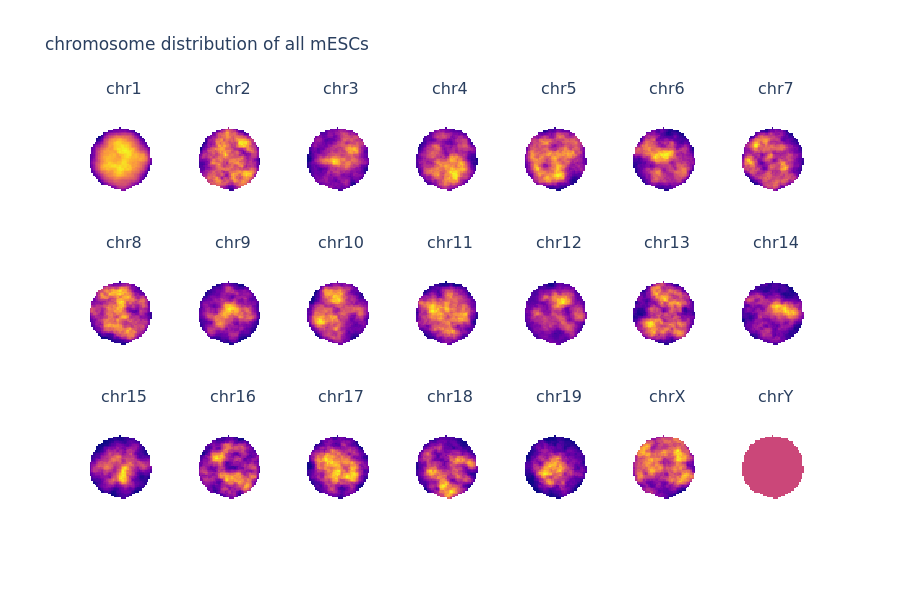

In [25]:
bfs = pd.read_pickle(arg_bfs_lr_ft_files["mESC"])
bfs = bfs.sort_index(axis=1)
fig = plot_chom_position(
    bfs,
    mm10,
    "chromosome distribution of all mESCs",
    lr_contour,
    #minCells=80
    )
fig.show(renderer="png")

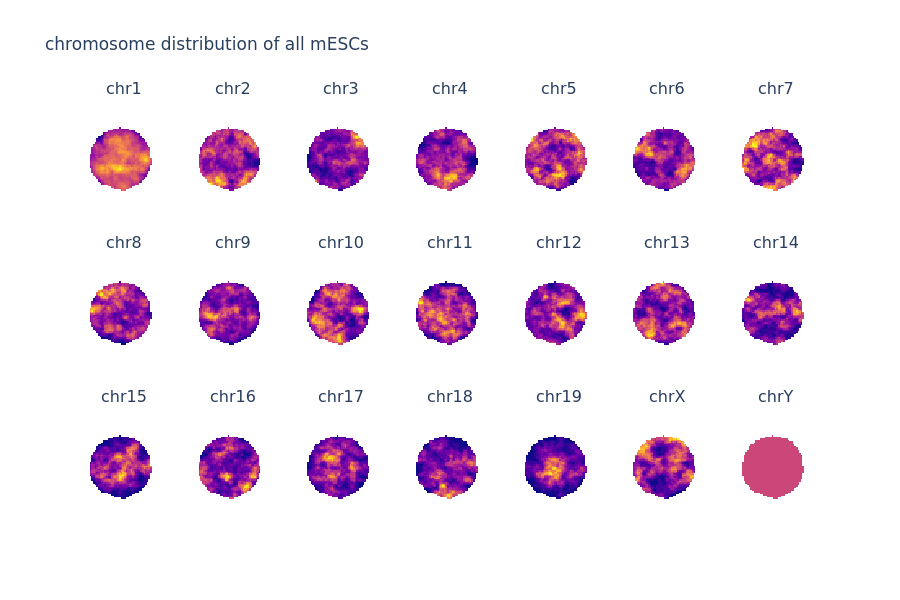

In [26]:
#bfs = pd.read_pickle(arg_bf_lr_cs_files["tillsperm25"])
#bfs = bfs.loc[-5:5].groupby(level=(1,2), observed=False).sum(min_count=1)
bfs = pd.read_pickle(arg_bfs_lr_ss_files["mESC"])
fig = plot_chom_position(
    bfs,
    mm10,
    "chromosome distribution of all mESCs",
    lr_contour,
    #minCells=80
    )
fig.show(renderer="png")
#fig.show()

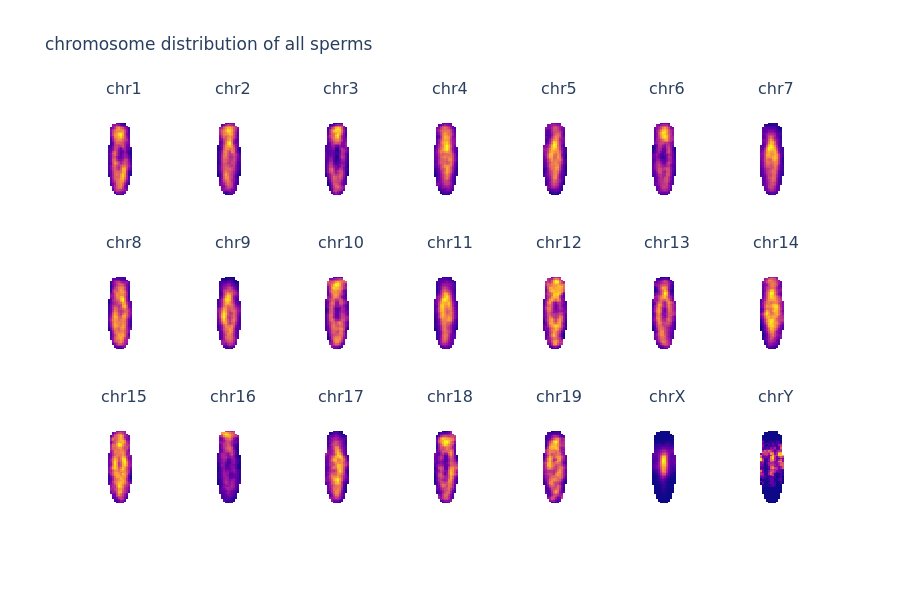

In [9]:
bfs = pd.read_pickle(arg_bfs_dv_ss_files["Sperm"])
fig = plot_chom_position(
    bfs,
    mm10,
    "chromosome distribution of all sperms",
    dv_contour,
    #minCells=80
    )
fig.show(renderer="png")

### distribution of different mouse

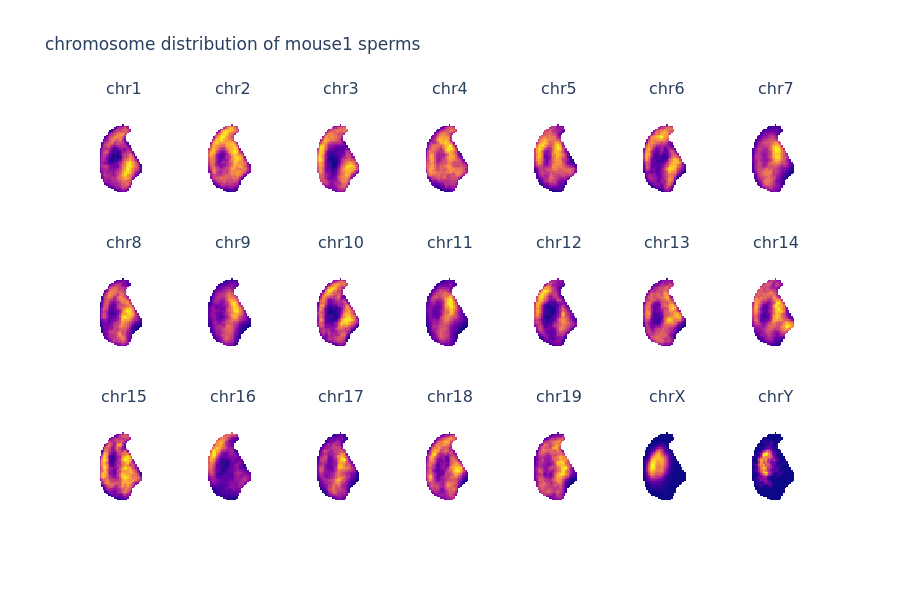

In [7]:
#bfs = pd.read_pickle(arg_bf_lr_cs_files["tillsperm25"])
#bfs = bfs.loc[-5:5].groupby(level=(1,2), observed=False).sum(min_count=1)
bfs = pd.read_pickle(arg_bfs_lr_ss_files["mouse1"])
fig = plot_chom_position(
    bfs,
    mm10,
    "chromosome distribution of mouse1 sperms",
    lr_contour,
    #minCells=80
    )
fig.show(renderer="png")

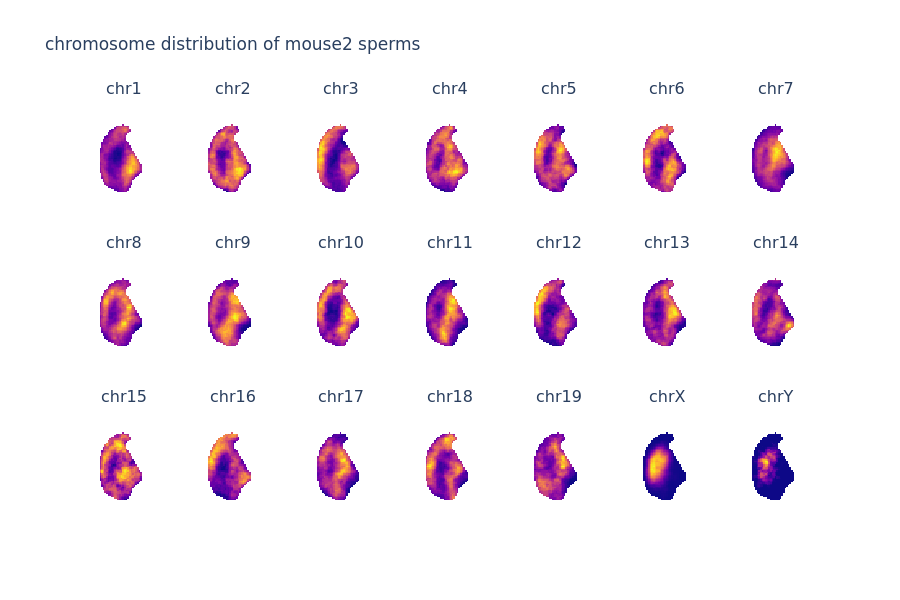

In [8]:
bfs = pd.read_pickle(arg_bfs_lr_ss_files["mouse2"])
fig = plot_chom_position(
    bfs,
    mm10,
    "chromosome distribution of mouse2 sperms",
    lr_contour,
    #minCells=80
    )
fig.show(renderer="png")

### intensity dist

In [10]:
bfs = pd.read_pickle(
    arg_bfs_lr_ss_files["Sperm"]
)

In [31]:
def plot_heatmap_with_bars(matrix):
    # 计算亮度积分
    row_sums = np.sum(matrix, axis=1)
    col_sums = np.sum(matrix, axis=0)
    
    # 创建热图
    heatmap = go.Heatmap(
        z=matrix,
        colorscale='plasma'
        )
    
    # 创建条形图（左侧）
    bar_y = go.Bar(
        x=row_sums,
        y=list(range(len(row_sums))),
        orientation='h',
        xaxis='x2',
        marker=dict(color='blue')
        )
    
    # 创建条形图（底部）
    bar_x = go.Bar(
        y=col_sums,
        x=list(range(len(col_sums))),
        orientation='v',
        yaxis='y2',
        marker=dict(color='red')
        )
    
    # 设置布局，以适应条形图和热图
    layout = go.Layout(
        xaxis=dict(domain=[0.2, 1]),
        yaxis=dict(domain=[0, 0.8]),
        xaxis2=dict(domain=[0, 0.15], anchor='y'),
        yaxis2=dict(domain=[0.85, 1], anchor='x')
    )
    
    # 组合图表
    fig = go.Figure(data=[heatmap, bar_x, bar_y], layout=layout)
    
    fig.update_layout(
        height = 600,
        width = 600,
        title = "chromosome distribution",
        plot_bgcolor = "rgba(0,0,0,0)",
        showlegend = False
    )
    # 显示图表
    return fig
import plotly.graph_objects as go
import numpy as np

def plot_heatmap_with_bars(matrix):
    # 计算亮度积分
    row_sums = np.sum(matrix, axis=1)
    col_sums = np.sum(matrix, axis=0)
    
    # 创建热图
    heatmap = go.Heatmap(
        z=matrix,
        colorscale='plasma',
        # 将colorbar放到左侧（实际上是移动热图使colorbar显示在左侧）
        colorbar=dict(x=-0.15)
    )
    
    # 创建条形图（右侧）
    bar_y = go.Bar(
        x=row_sums,
        y=list(range(len(row_sums))),
        orientation='h',
        xaxis='x2',
        marker=dict(color='blue')
    )
    
    # 创建条形图（底部）
    bar_x = go.Bar(
        y=col_sums,
        x=list(range(len(col_sums))),
        orientation='v',
        yaxis='y2',
        marker=dict(color='red')
    )
    
    # 设置布局，以适应条形图和热图
    layout = go.Layout(
        xaxis=dict(domain=[0.15, 0.85]),  # 为colorbar腾出空间
        yaxis=dict(domain=[0, 0.85]),
        xaxis2=dict(domain=[0.85, 1], anchor='y'),  # 将右侧的barplot的xaxis2移动到右侧
        yaxis2=dict(domain=[0.85, 1], anchor='x')
    )
    
    # 组合图表
    fig = go.Figure(data=[heatmap, bar_x, bar_y], layout=layout)
    
    fig.update_layout(
        height = 600,
        width = 600,
        title = "Chromosome Distribution",
        plot_bgcolor = "rgba(0,0,0,0)",
        showlegend = False
    )
    # 显示图表
    return fig

# 测试函数，使用一个随机矩阵作为例子
# matrix = np.random.rand(10, 10)
# fig = plot_heatmap_with_bars(matrix)
# fig.show()


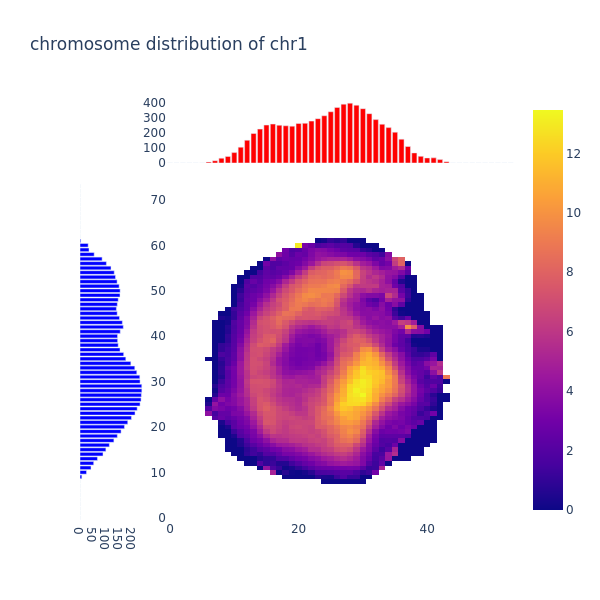

In [209]:
chrom = "chr1"
fig = plot_heatmap_with_bars(
    bfs[f"{chrom}_dist"].mean(axis=1).unstack()
)
fig.update_layout(
    title = f"chromosome distribution of {chrom}"
)
fig.show(renderer="png")

In [26]:
col_idx = bfs.columns.get_level_values(0).isin(
    [f"chr{i}_dist" for i in [7,8,9,11,13,17,19]]
)
# col_idx = bfs.columns.get_level_values(0).isin(
#     [f"chr{i}_dist" for i in [7,8,9,11,13,17,19]]
# )
other_col_idx = ~col_idx
other_col_idx = (~bfs.columns.get_level_values(0).isin(
    ["chrX_dist"]
)) & (other_col_idx)

In [27]:
bfs = bfs.sort_index(axis=1)

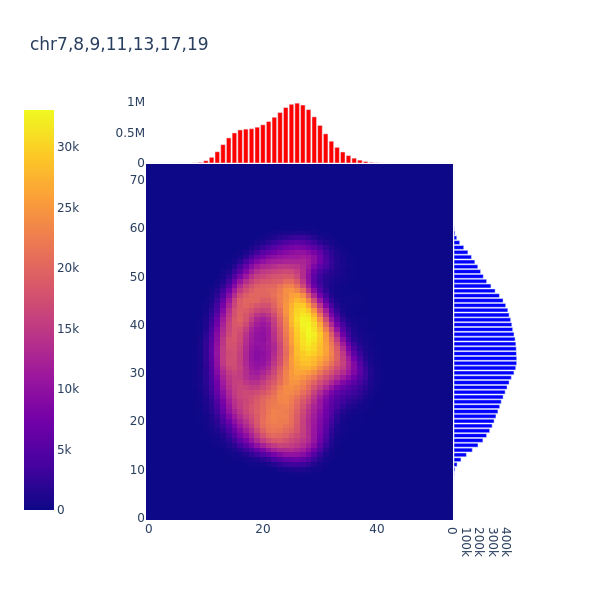

In [32]:
fig = plot_heatmap_with_bars(
    bfs.loc[:,col_idx].sum(axis=1).unstack()
)
fig.update_layout(
    title = "chr7,8,9,11,13,17,19"
)
fig.show(renderer="png")

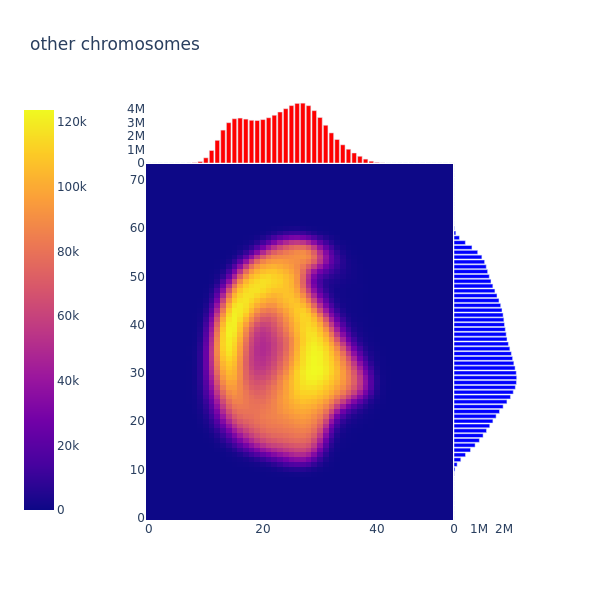

In [33]:
fig = plot_heatmap_with_bars(
    bfs.loc[:,other_col_idx].sum(axis=1).unstack()
)
fig.update_layout(
    title = "other chromosomes"
)
fig.show(renderer="png")

### embedding of chromosomes

In [232]:
mouse1_bfs = pd.read_pickle(arg_bfs_lr_ss_files["mouse1"])
mouse2_bfs = pd.read_pickle(arg_bfs_lr_ss_files["mouse2"])
bfs = pd.read_pickle(arg_bfs_lr_ss_files["Sperm"])
Sperm_voxel = pd.read_pickle(arg_bfs_voxel_files["Sperm"])

In [265]:
def prepare_design_matrix(bfs, chroms):
    dist_rows = [f"{chrom}_dist" for chrom in chroms]
    design_matrix = bfs.T.groupby(
        level=0
    ).mean().loc[dist_rows]
    # drop full-na columns
    print(design_matrix.shape)
    design_matrix = design_matrix.dropna(
        axis=1, how="all"
        )
    print(design_matrix.shape)
    # fill na with 0
    design_matrix = design_matrix.fillna(0)
    # normalize withing each entry
    design_matrix = design_matrix.div(
        design_matrix.mean(axis=1),
        axis=0
    )
    design_matrix = design_matrix.rename(
        index = {f"{chrom}_dist" : chrom for chrom in chroms}
    )
    return design_matrix

In [237]:
from hic_basic.data import chromosomes
chroms = chromosomes("mm10").index
chroms = [i for i in chroms if i not in ["chrX","chrY"]]


In [266]:
mouse1_dsgn_m = prepare_design_matrix(mouse1_bfs, chroms)
mouse1_dsgn_m = mouse1_dsgn_m.rename(
    index = {chrom : f"m1_{chrom}" for chrom in chroms}
)
mouse2_dsgn_m = prepare_design_matrix(mouse2_bfs, chroms)
mouse2_dsgn_m = mouse2_dsgn_m.rename(
    index = {chrom : f"m2_{chrom}" for chrom in chroms}
)
Sperm_dsgn_m = prepare_design_matrix(bfs, chroms)
Sperm_voxel_design_matrix = prepare_design_matrix(
    Sperm_voxel, chroms)

(19, 3996)
(19, 1498)
(19, 3996)
(19, 1614)
(19, 3996)
(19, 1622)
(19, 6048)
(19, 1306)


In [248]:
1622*50

81100

In [224]:
dsgn_m = pd.concat(
    [mouse1_dsgn_m, mouse2_dsgn_m],
    axis=0,
    join="inner"
)

In [225]:
# do PCA on design_matrix
from sklearn.decomposition import PCA
n_components = 10
pca = PCA(n_components=10)
pca_samples = pca.fit_transform(dsgn_m)
pca_samples = pd.DataFrame(
    pca_samples,
    index = dsgn_m.index,
    columns = [f"PC{i}" for i in range(1, n_components+1)]
)

In [226]:
import seaborn as sns

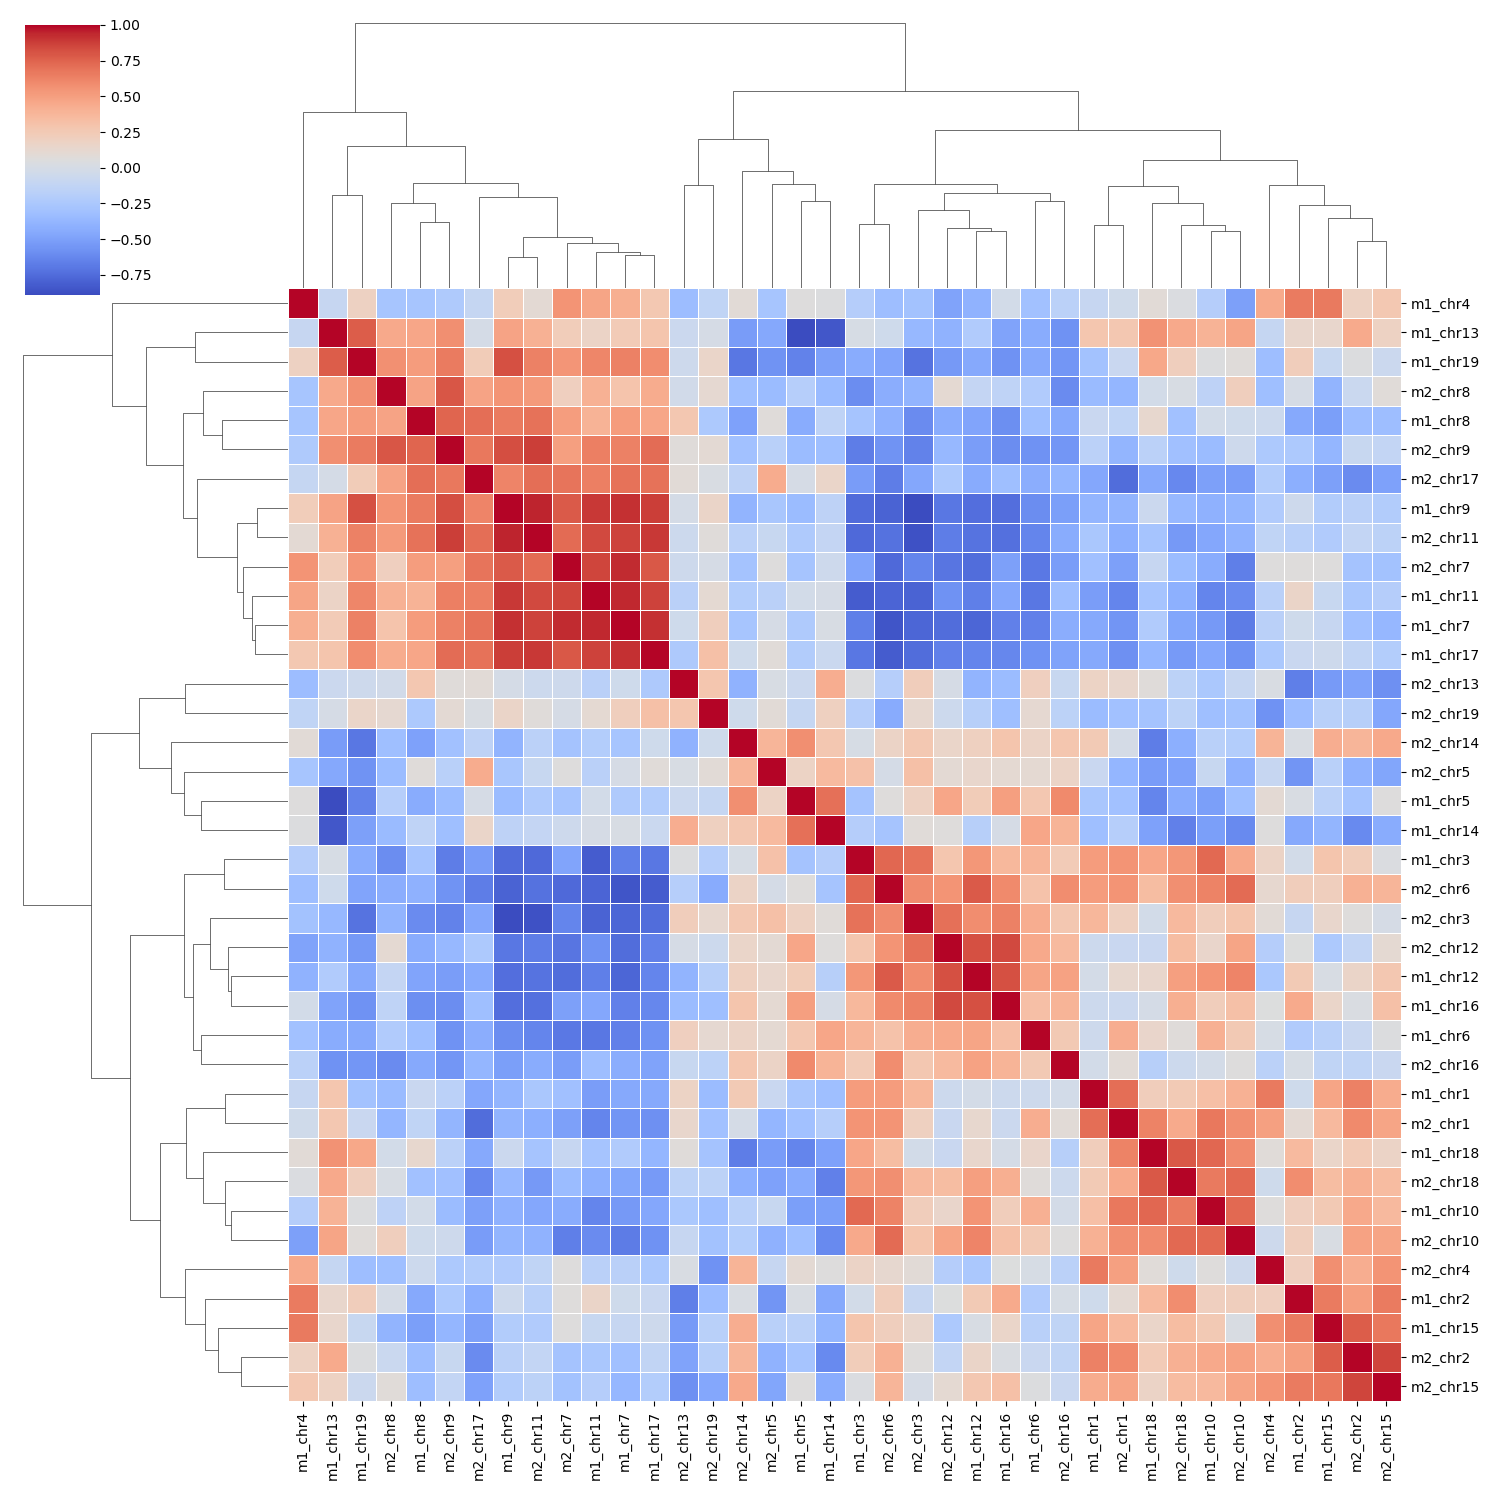

In [227]:
sns.clustermap(pca_samples.T.corr(), 
               method='average',  # 聚类时使用的方法，如'average'、'single'或'complete'
               metric='euclidean',  # 计算距离时使用的度量
               cmap='coolwarm',  # 热图颜色映射
               linewidths=.5,  # 热图线宽
               figsize=(15, 15))  # 图片尺寸

plt.show()

In [228]:
# do PCA on design_matrix
from sklearn.decomposition import PCA
n_components = 10
pca = PCA(n_components=10)
pca_samples = pca.fit_transform(Sperm_dsgn_m)
pca_samples = pd.DataFrame(
    pca_samples,
    index = Sperm_dsgn_m.index,
    columns = [f"PC{i}" for i in range(1, n_components+1)]
)

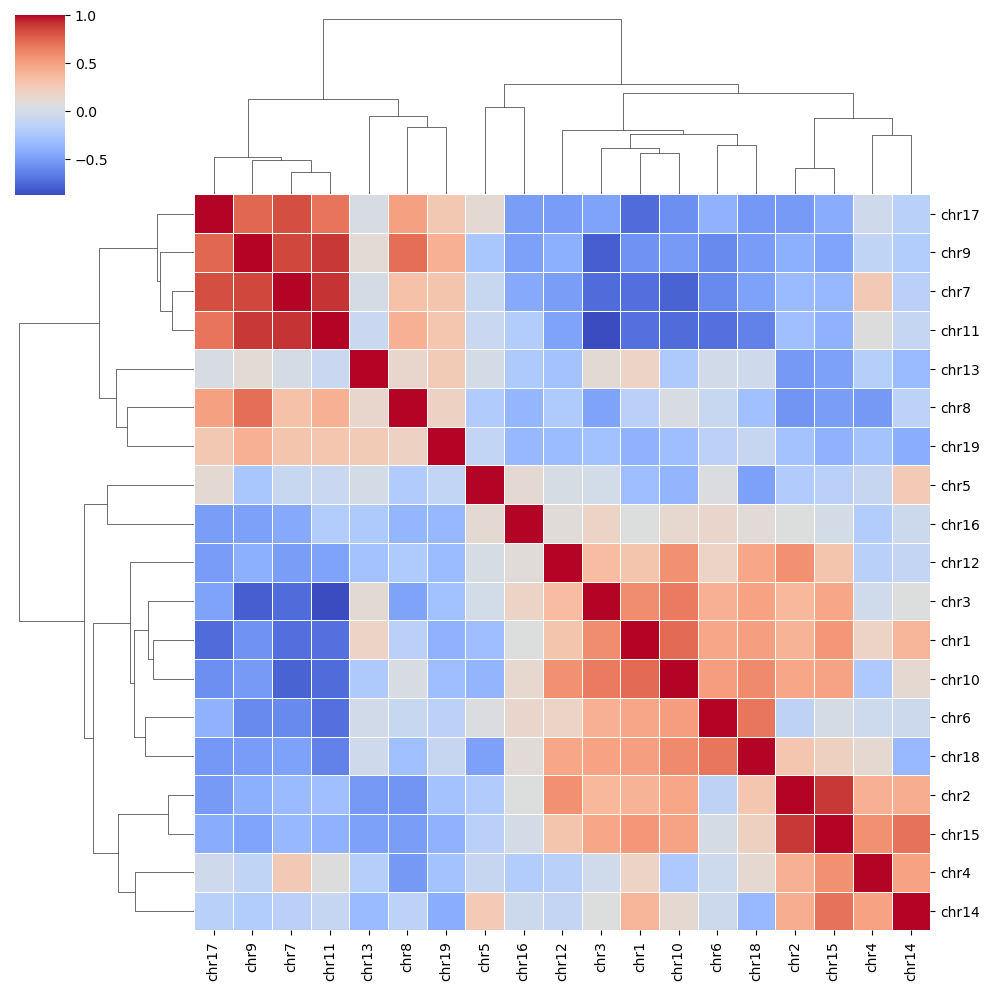

In [229]:
sns.clustermap(pca_samples.T.corr(), 
               method='average',  # 聚类时使用的方法，如'average'、'single'或'complete'
               metric='euclidean',  # 计算距离时使用的度量
               cmap='coolwarm',  # 热图颜色映射
               linewidths=.5,  # 热图线宽
               figsize=(10, 10))  # 图片尺寸

plt.show()

In [242]:
# do PCA on design_matrix
from sklearn.decomposition import PCA
n_components = 12
pca = PCA(n_components=n_components)
pca_samples = pca.fit_transform(Sperm_voxel_design_matrix)
pca_samples = pd.DataFrame(
    pca_samples,
    index = Sperm_voxel_design_matrix.index,
    columns = [f"PC{i}" for i in range(1, n_components+1)]
)

Text(0, 0.5, 'cumulative variance')

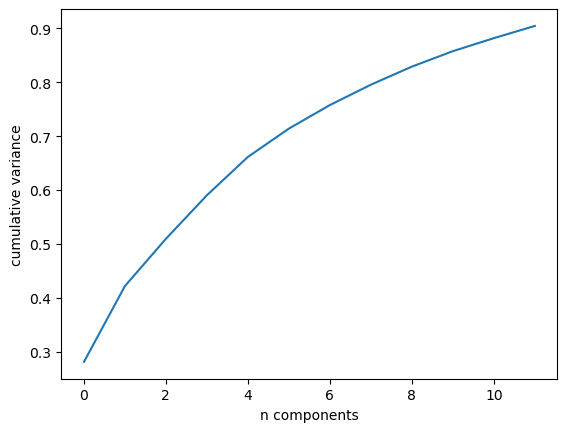

In [243]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')

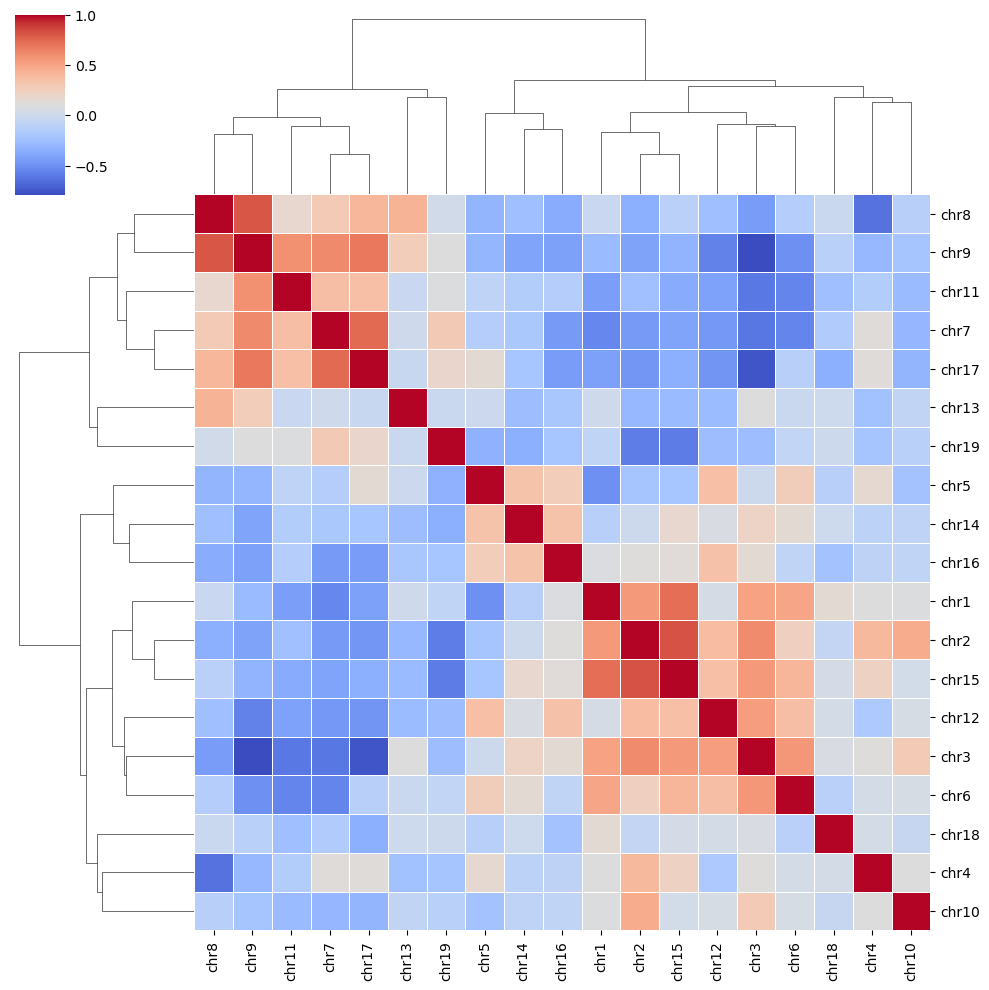

In [244]:
sns.clustermap(pca_samples.T.corr(), 
               method='average',  # 聚类时使用的方法，如'average'、'single'或'complete'
               metric='euclidean',  # 计算距离时使用的度量
               cmap='coolwarm',  # 热图颜色映射
               linewidths=.5,  # 热图线宽
               figsize=(10, 10))  # 图片尺寸

plt.show()

In [132]:
from plotly import express as px
data = pca_samples.assign(
    batch = [i.split("_")[0] for i in pca_samples.index]
)
data = data.replace(
    {"batch" : {
        "m1" : "mouse1",
        "m2" : "mouse2"
    }
    }
)
data = data.assign(
    chrom_group = "others"
)
data.loc[
    ["m1_chr7","m1_chr9", "m1_chr11", "m1_chr17", "m1_chrX",
     "m2_chr7","m2_chr9", "m2_chr11", "m2_chr17", "m2_chrX"],
     "chrom_group"
] = "chr7,9,11,17,X"


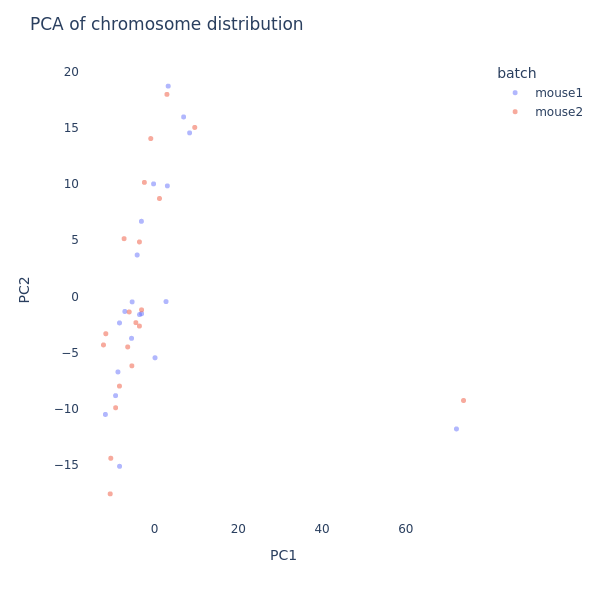

In [133]:
fig = px.scatter(
    data,
    x = "PC1",
    y = "PC2",
    #text = pca_samples.index
    color = "batch",
    hover_name=pca_samples.index,
)
fig = fig.update_traces(
    # set point size
    marker=dict(
        size=5,
        opacity=0.5
    )
)
fig.update_layout(
    title = "PCA of chromosome distribution",
    plot_bgcolor = "rgba(0,0,0,0)",
    height = 600,
    width = 600
)
fig.show(renderer="png")

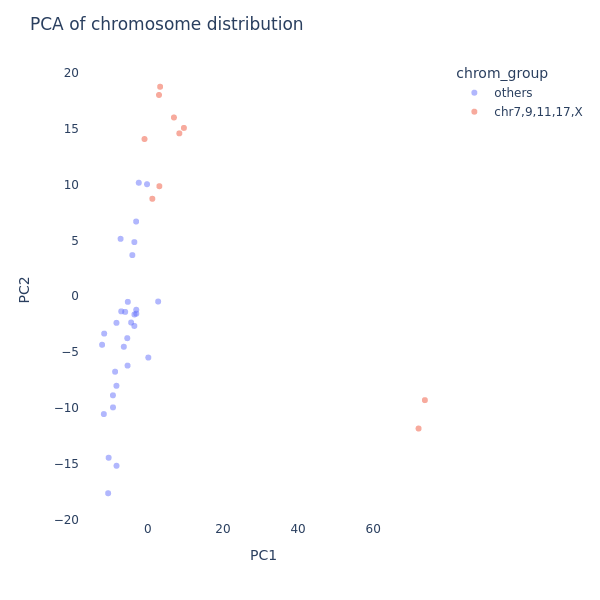

In [134]:
fig = px.scatter(
    data,
    x = "PC1",
    y = "PC2",
    #text = pca_samples.index
    color = "chrom_group"
)
fig = fig.update_traces(
    # set point size
    marker=dict(
        size=6,
        opacity=0.5
    )
)
fig.update_layout(
    title = "PCA of chromosome distribution",
    plot_bgcolor = "rgba(0,0,0,0)",
    height = 600,
    width = 600
)
fig.show(renderer="png")

In [135]:
from umap import UMAP

In [136]:
umap = UMAP(n_components=2)
umap_samples = umap.fit_transform(
    pca_samples.iloc[:,:8]
)
umap_samples = pd.DataFrame(
    umap_samples,
    index = pca_samples.index,
    columns = ["UMAP1", "UMAP2"]
)

In [137]:
data = umap_samples.assign(
    batch= [i.split("_")[0] for i in umap_samples.index]
)
data = data.replace(
    {
        "batch" : {
            "m1" : "mouse1",
            "m2" : "mouse2"
        }
    }
)

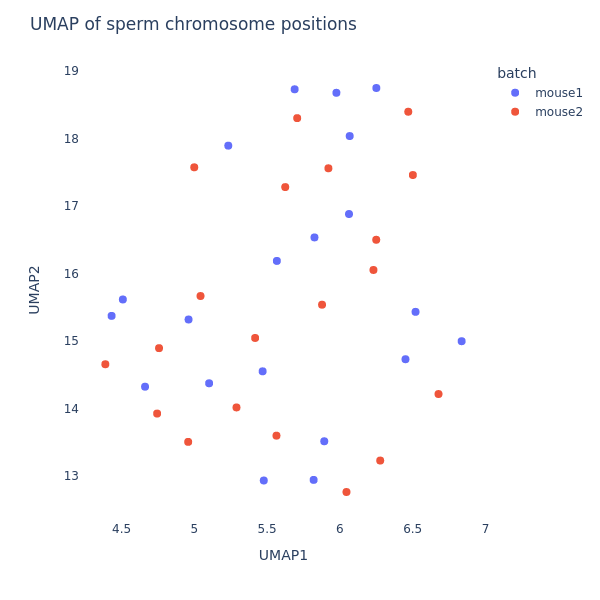

In [138]:
fig = px.scatter(
    data,
    x = "UMAP1",
    y = "UMAP2",
    color = "batch"
    #text = umap_samples.index
)
fig = fig.update_traces(
    # set point size
    marker=dict(size=8)
)
fig.update_layout(
    title = "UMAP of sperm chromosome positions",
    height = 600,
    width = 600,
    plot_bgcolor = "rgba(0,0,0,0)"
)
fig.show(renderer="png")

In [97]:
# fig = px.scatter(
#     data,
#     x = "UMAP1",
#     y = "UMAP2",
#     color = "batch",
#     text = umap_samples.index
# )
# fig = fig.update_traces(
#     # set point size
#     marker=dict(size=8)
# )
# fig.update_layout(
#     title = "UMAP of sperm chromosome positions",
#     height = 600,
#     width = 600,
#     plot_bgcolor = "rgba(0,0,0,0)"
# )
#fig.show(renderer="png")

In [139]:
data = data.assign(
    chrom_group = "others"
)
data.loc[
    ["m1_chr7","m1_chr9", "m1_chr11", "m1_chr17", "m1_chrX",
     "m2_chr7","m2_chr9", "m2_chr11", "m2_chr17", "m2_chrX"],
     "chrom_group"
] = "chr7,9,11,17,X"

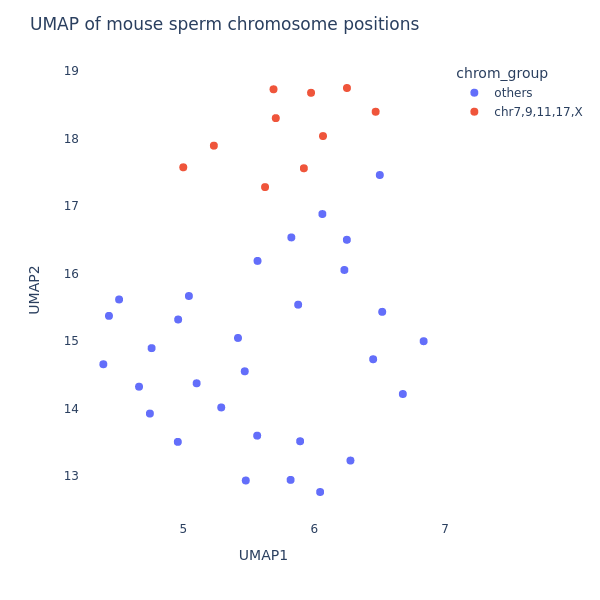

In [140]:
fig = px.scatter(
    data,
    x = "UMAP1",
    y = "UMAP2",
    color = "chrom_group"
    #text = umap_samples.index
)
fig = fig.update_traces(
    # set point size
    marker=dict(size=8)
)
fig.update_layout(
    title = "UMAP of mouse sperm chromosome positions",
    height = 600,
    width = 600,
    plot_bgcolor = "rgba(0,0,0,0)"
)
fig.show(renderer="png")